<a href="https://colab.research.google.com/github/cmont13/IDX_Winter26_DS40/blob/main/notebook01_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [ ]:
property_dfs = []

dir_path = '/content/drive/MyDrive/property_data'

for path in os.listdir(dir_path):
    property_dfs.append(pd.read_csv(os.path.join(dir_path, path)))

property_data_2025 = pd.concat(property_dfs, ignore_index=True)

property_data_2025 = property_data_2025[(property_data_2025['PropertyType'] == 'Residential') & (property_data_2025['PropertySubType'] == 'SingleFamilyResidence')]

/tmp/ipython-input-1832568546.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  property_dfs.append(pd.read_csv(os.path.join(dir_path, path)))


In [ ]:
lower_bound_close_price = property_data_2025['ClosePrice'].quantile(.005)
upper_bound_close_price = property_data_2025['ClosePrice'].quantile(.995)

property_data_2025 = property_data_2025[(property_data_2025['ClosePrice'] > lower_bound_close_price) & (property_data_2025['ClosePrice'] < upper_bound_close_price)]

In [ ]:
property_data_2025.head()

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,OrangeCounty,OrangeCounty,"Carpet,Tile",False,NaN,NaN,False,1250000.0,1147233684,mattkanoudi@gmail.com,...,3.0,False,2.0,Huntington Beach Union High,92646,0.0,5913.0,NaN,NaN,NaN
1,Mlslistings,Mlslistings,Carpet,False,NaN,NaN,NaN,NaN,1147228247,babeksells@gmail.com,...,NaN,False,2.0,Other,95124,NaN,18432.0,NaN,NaN,NaN
2,PacificSouthwest,PacificSouthwest,NaN,False,NaN,NaN,False,799900.0,1147223143,rigosd@gmail.com,...,0.0,NaN,2.0,San Diego Unified,92173,0.0,5300.0,NaN,NaN,NaN
3,PacificSouthwest,PacificSouthwest,NaN,False,NaN,NaN,False,925000.0,1147209231,conchita@conchitalopez.com,...,1.0,NaN,3.0,Sweetwater Union,92154,55.0,5272.0,NaN,NaN,NaN
4,NorthSanLuisObispo,NorthSanLuisObispo,NaN,False,NaN,NaN,False,1300000.0,1147200364,dmvonderheide@gmail.com,...,3.0,False,3.0,Templeton Unified,93465,0.0,10500.0,NaN,NaN,NaN


# Distribution Plots

<Axes: ylabel='Density'>

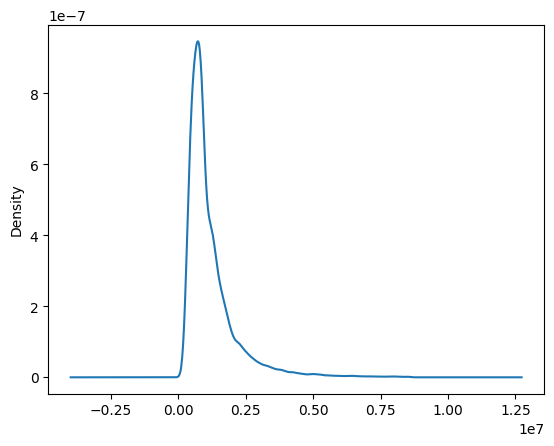

In [ ]:
property_data_2025['ClosePrice'].plot.kde()

<Axes: ylabel='Density'>

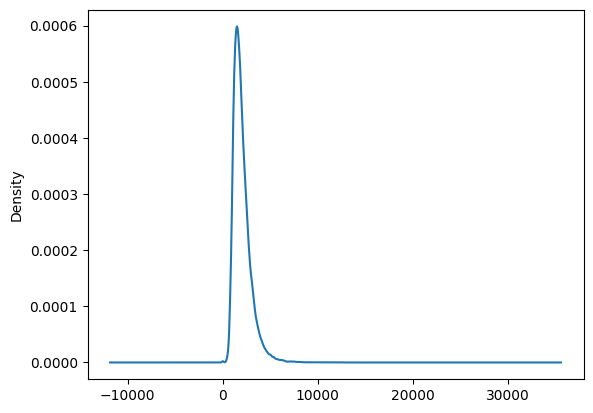

In [ ]:
property_data_2025['LivingArea'].plot.kde()

<Axes: ylabel='Density'>

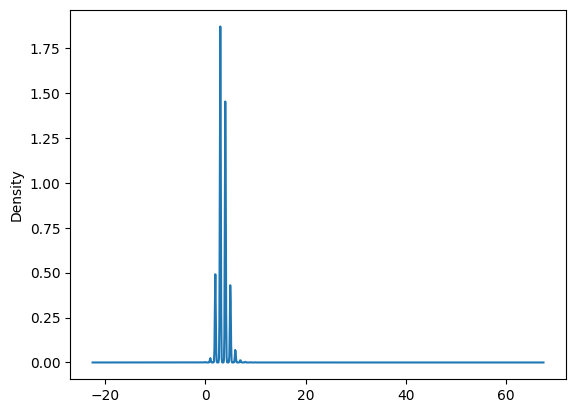

In [ ]:
property_data_2025['BedroomsTotal'].plot.kde()

<Axes: ylabel='Density'>

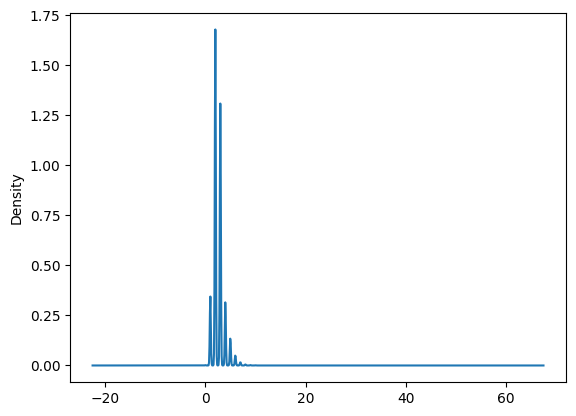

In [ ]:
property_data_2025['BathroomsTotalInteger'].plot.kde()

<Axes: ylabel='Density'>

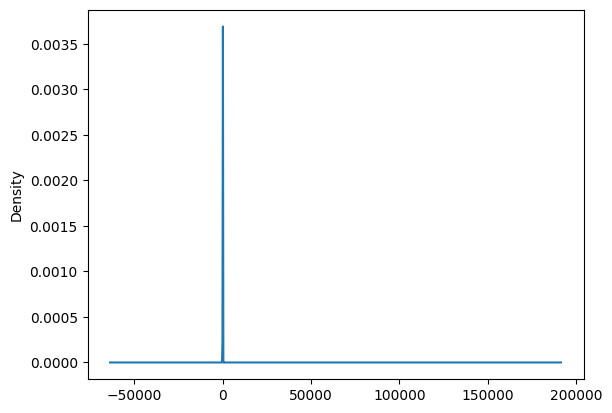

In [ ]:
property_data_2025['LotSizeAcres'].plot.kde()

# Correlation Heatmap

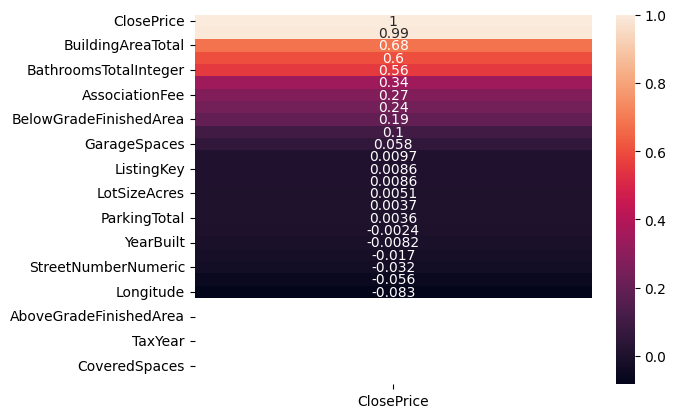

In [34]:
corr_matrix = property_data_2025.corr(numeric_only=True)['ClosePrice'].sort_values(ascending=False).to_frame()
sns.heatmap(corr_matrix, annot=True)
plt.show()